# CKME 136 - Twitter Sentiment Analysis

In [284]:
import pandas as pd
import numpy as np
import re #regex
import nltk #text processing
import matplotlib #visualisation
import matplotlib.pyplot as plt #visualisation
import seaborn as sns #visualisation
import warnings
import string
warnings.filterwarnings('ignore')
%matplotlib inline 

In [285]:
#Importing the csv
raw = pd.read_csv('tweets_global.csv')

In [286]:
#First 5 entries in the dataset
raw.head(5)

,tweet,existence,existence.confidence
0,Global warming report urges governments to act...,Yes,1.0000
1,Fighting poverty and global warming in Africa ...,Yes,1.0000
2,Carbon offsets: How a Vatican forest failed to...,Yes,0.8786
3,Carbon offsets: How a Vatican forest failed to...,Yes,1.0000
4,URUGUAY: Tools Needed for Those Most Vulnerabl...,Yes,0.8087


In [287]:
#Rows x Columns in dataset before data cleaning
raw.shape

(6090, 3)

In [288]:
#Checking for uniques in existence column
raw.existence.unique()

array(['Yes', nan, 'No', 'Y', 'N'], dtype=object)

existence
N      1031
No       46
Y      2467
Yes     437
Name: tweet, dtype: int64

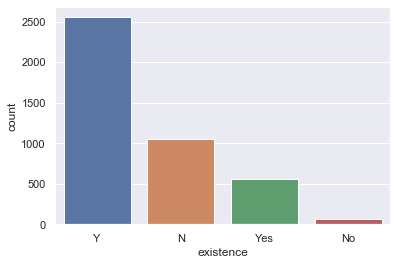

In [289]:
#Plotting for how many uniques in existence column
sns.set()
sns.countplot(raw.existence, order = raw.existence.value_counts().index);

#Grouping and counting how many tweets in each group
raw.groupby('existence')['tweet'].nunique()

In [290]:
#Data types
raw.dtypes

tweet                    object
existence                object
existence.confidence    float64
dtype: object

In [291]:
raw.describe()

,existence.confidence
count,6087.000000
mean,0.794478
std,0.180054
min,0.334600
25%,0.658500
50%,0.707600
75%,1.000000
max,1.000000


## Data Cleaning

In [292]:
#Group and replace the N and Y to No and Yes
raw['existence'] = raw['existence'].replace('N','No')
raw['existence'] = raw['existence'].replace('Y','Yes')

#Checking if replaced
raw.groupby(['existence'])['tweet'].count()

existence
No     1114
Yes    3111
Name: tweet, dtype: int64

In [293]:
#Count how many NaN values in each column
raw.isnull().sum()

tweet                      0
existence               1865
existence.confidence       3
dtype: int64

In [294]:
#Dropping any NAs in the existence column
df = raw.dropna(subset=['existence'])

#Check if removed
df.isnull().sum()

tweet                   0
existence               0
existence.confidence    0
dtype: int64

In [295]:
#Check how many tweets are duplicates
df[df['tweet'].duplicated() == True].count()

tweet                   336
existence               336
existence.confidence    336
dtype: int64

In [296]:
#Dropping any duplicates in the tweet column
df.drop_duplicates(subset='tweet',keep=False, inplace=True)

#Check if removed
df[df['tweet'].duplicated() == True].count()

tweet                   0
existence               0
existence.confidence    0
dtype: int64

In [297]:
#df

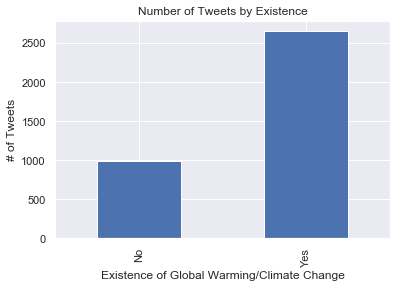

In [298]:
#Plotting a bar graph of the existence tweets (Yes/No)
#Ref: https://matplotlib.org/tutorials/introductory/pyplot.html
df.groupby('existence')['tweet'].nunique().plot(kind='bar')
plt.xlabel("Existence of Global Warming/Climate Change")
plt.ylabel("# of Tweets")
plt.title("Number of Tweets by Existence")
plt.show()

In [299]:
#Number of tweets values by existence
df.existence.value_counts()

Yes    2652
No      994
Name: existence, dtype: int64

In [300]:
#Calculate the lengths of the tweets
df['length'] = df.tweet.str.len()

112.77043335161821

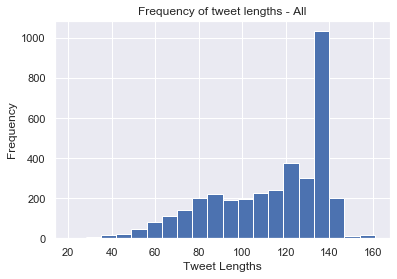

In [301]:
#Histogram - Frequency distribution of tweet lengths
plt.xlabel("Tweet Lengths")
plt.ylabel("# of Tweets")
plt.title("Frequency of tweet lengths - All")
df.length.plot.hist(bins=20)

#Average Length
df.length.mean()

112.4449472096531

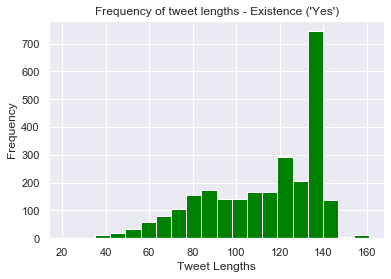

In [302]:
#Histogram - Frequency distribution of tweet lengths
#Existence = YES
plt.xlabel("Tweet Lengths")
plt.ylabel("# of Tweets")
plt.title("Frequency of tweet lengths - Existence ('Yes')")
df[df['existence'] == 'Yes'].length.plot.hist(bins=20, color='green')

#Average Length
df[df['existence'] == 'Yes'].length.mean()

113.63883299798793

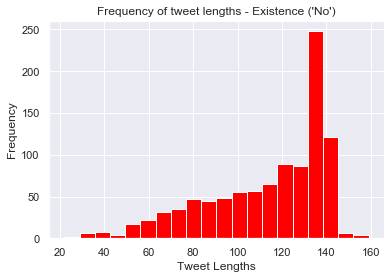

In [303]:
#Histogram - Frequency distribution of tweet lengths
#Existence = NO
plt.xlabel("Tweet Lengths")
plt.ylabel("# of Tweets")
plt.title("Frequency of tweet lengths - Existence ('No')")
df[df['existence'] == 'No'].length.plot.hist(bins=20,color = 'red')

#Average Length
df[df['existence'] == 'No'].length.mean()

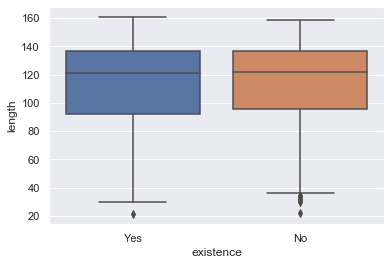

In [304]:
#Boxplot of the length of tweets by existence'
#Ref: https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="existence", y="length", data=df)

## Text preprocessing

In [305]:
#Text preprocessing - using regex
#Ref: https://docs.python.org/3/library/re.html
def preprocess(df,text):
    df[text] = df[text].str.lower() #make all lowercase
    df[text] = df[text].str.replace('http', '') #URLS
    df[text] = df[text].str.replace('@\S+', '') #mentions - must be first removal otherwise won't remove mentions
    df[text] = df[text].str.replace('[{}]'.format(string.punctuation), '') #remove punctuation
    df[text] = df[text].str.replace('\d+', '') #remove numbers
    df[text] = df[text].str.replace('rt', '') #remove rt
    df[text] = df[text].str.replace('link', '') #remove link
    df[text] = df[text].str.replace('via', '') #remove via
    df[text] = df[text].str.replace('new', '') #remove new
    df[text] = df[text].str.replace('news', '') #remove news
    df[text] = df[text].str.replace('\W', ' ') #remove symbols
    return df

In [306]:
#Applying text preprocessing function
df = preprocess(df,'tweet')

### Tokenization 

In [307]:
#Tweet Tokenization
#Ref: https://www.nltk.org/api/nltk.tokenize.html
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

In [308]:
#Applying tokenization
df['tweet'] = df['tweet'].apply(tknzr.tokenize)

In [309]:
df

,tweet,existence,existence.confidence,length
49,"[immigration, reform, and, climate, change, a,...",Yes,0.7774,80
57,"[peoples, world, grand, rapids, mich, opponent...",Yes,0.6812,124
60,"[check, this, video, out, the, business, of, c...",Yes,1.0000,77
83,"[recycling, water, meat, and, global, warming,...",Yes,0.7774,73
86,"[don, blankenship, mine, safety, regulators, a...",No,1.0000,75
...,...,...,...,...
6084,"[its, á, and, climbing, in, nyc, august, weath...",Yes,1.0000,117
6085,"[the, phrase, global, warming, should, be, aba...",Yes,1.0000,138
6087,"[global, warming, you, tube, parody, you, will...",No,0.6411,78
6088,"[oneeyed, golfer, dont, dare, tell, me, about,...",No,1.0000,138


### Stopwords 

In [310]:
#Removing Stopwords
#Ref: https://www.nltk.org/book/ch02.html
from nltk.corpus import stopwords
stop = stopwords.words('english')

def remove_stopwords(text):
    text = [word for word in text if word not in stop]
    text = ' '.join(x for x in text)
    return text

In [311]:
#Applying the stopwords function
df['tweet'] = df['tweet'].apply(remove_stopwords)

### Stemming

In [312]:
#Stemming
#Ref: https://www.nltk.org/howto/stem.html
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")

def stemm_words(text):
    text = [stemmer.stem(word) for word in text.split()]
    text = ' '.join(x for x in text)
    return text

In [313]:
#Applying stemming function
df['tweet'] = df['tweet'].apply(stemm_words)

In [314]:
#Frequency Distribution of Words
#Ref: https://www.nltk.org/book/ch01.html
from nltk import FreqDist
fD_Stemmed = FreqDist(sum(df['tweet'].apply(tknzr.tokenize),[])).most_common()

In [315]:
#Create Dataframe for tweets with counts
commonwords = pd.DataFrame(fD_Stemmed, columns = ['Word' , 'Count']) 

In [316]:
#Showing Table of the 50 most common words
#Still Work in progress - Need to clean up in text preprocessing
commonwords[:50]

,Word,Count
0,global,2105
1,climat,2037
2,warm,1995
3,chang,1866
4,snow,216
5,us,156
6,tcot,156
7,dc,147
8,scienc,139
9,green,135


### WordCloud

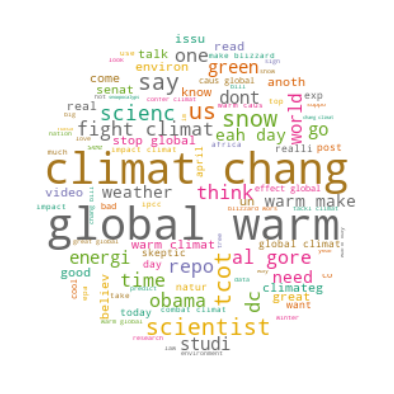

In [317]:
#Generating WordCloud - ALL tweets
#Ref: http://amueller.github.io/word_cloud/#
#Ref: https://www.datacamp.com/community/tutorials/wordcloud-python
from wordcloud import WordCloud, STOPWORDS

#Joining all tweets together
all_text = " ".join(tweet for tweet in df.tweet)

#Setting stopwords
stopwords = set(STOPWORDS)

#Creating x, y coordinate grid
x, y = np.ogrid[:300, :300]

#Creating Mask
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width=1200, height=1200,stopwords=stopwords,mask=mask,background_color='white',colormap=matplotlib.cm.Dark2, max_words=100).generate(all_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

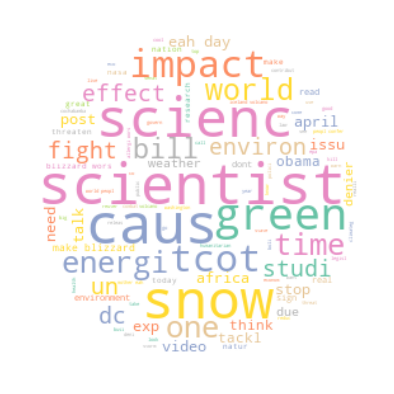

In [318]:
#Generating WordCloud Existence = 'YES'
#Ref: https://github.com/amueller/word_cloud
#Ref: https://www.datacamp.com/community/tutorials/wordcloud-python
#Setting existence only tweets
y_df = df[df['existence'] == 'Yes']

#Joining existence Yes tweets together
yes_text = " ".join(tweet for tweet in y_df.tweet)

#Updating stopwords
stopwords = set(STOPWORDS)
stopwords.update(['climat','global','warm','chang','say','us','repo'])

#Creating x, y coordinate grid
x, y = np.ogrid[:300, :300]

#Creating Mask
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width=1200, height=1200,stopwords=stopwords,mask=mask,background_color='white',colormap=matplotlib.cm.Set2, max_words=100).generate(yes_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

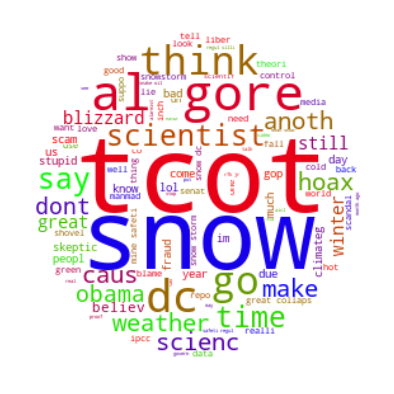

In [319]:
#Generating WordCloud - Existence = 'NO'
#Ref: https://github.com/amueller/word_cloud
#Ref: https://www.datacamp.com/community/tutorials/wordcloud-python
#Setting existence No tweets
n_df = df[df['existence'] == 'No']

#Joining all existence No tweets
no_text = " ".join(tweet for tweet in n_df.tweet)

#Updating stopwords
stopwords = set(STOPWORDS)
stopwords.update(['climat','global','warm','chang'])

#Creating x,y coordinate grid
x, y = np.ogrid[:300, :300]

#Creating mask
mask = (x - 150) ** 2 + (y - 150) ** 2 > 130 ** 2
mask = 255 * mask.astype(int)

wordcloud = WordCloud(width=1200, height=1200,stopwords=stopwords,mask=mask,background_color='white',colormap=matplotlib.cm.brg, max_words=100).generate(no_text)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()

## Machine Learning

In [320]:
#Creating Training and Test Set 80/20
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split
X = df['tweet']
y = df['existence']

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 5162)

In [321]:
#Utilizing TF-IDF to extract features
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer()

X_train_counts = tfidf_vectorizer.fit_transform(X_train)
X_test_counts = tfidf_vectorizer.transform(X_test)

In [322]:
#Model Performance and evaluation
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html#sklearn.metrics.accuracy_score
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.f1_score.html#sklearn.metrics.f1_score
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html#sklearn.metrics.recall_score
#Ref: https://kite.com/python/docs/sklearn.metrics.classification.recall_score
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html#sklearn.metrics.precision_score
from sklearn import metrics

def model_eval(y_test,y_pred_counts):
    accuracy = metrics.accuracy_score(y_test, y_pred_counts)
    f1_score = metrics.f1_score(y_test, y_pred_counts, average='weighted',pos_label=None) #avg weighted by support (takes imbalance into acct)
    recall = metrics.recall_score(y_test, y_pred_counts, average='weighted',pos_label=None) #avg weighted by support (takes imbalance into acct)
    precision = metrics.precision_score(y_test, y_pred_counts, average='weighted',pos_label=None) #avg weighted by support (takes imbalance into acct)
    return accuracy, f1_score, recall, precision

### SVM

In [323]:
#SVM Classifier
#Ref: https://www.svm-tutorial.com/2014/10/svm-linear-kernel-good-text-classification/
from sklearn import svm
svm_c = svm.SVC(kernel='linear') #Using Linear Kernel

In [324]:
#Training the model with SVM
svm_c.fit(X_train_counts, y_train)

#Predicting the result
y_pred_counts = svm_c.predict(X_test_counts)

### SVM Results

In [325]:
#Main Classification Metrics
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_counts))

              precision    recall  f1-score   support

          No       0.70      0.53      0.61       189
         Yes       0.85      0.92      0.88       541

    accuracy                           0.82       730
   macro avg       0.78      0.73      0.75       730
weighted avg       0.81      0.82      0.81       730



In [326]:
#Confusion Matrix
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_counts)

array([[101,  88],
       [ 43, 498]], dtype=int64)

In [327]:
#Storing values of model performance
accuracy, f1_score,recall,precision = model_eval (y_test,y_pred_counts)

In [328]:
#Accuracy
#(tp+tn)/total 
accuracy

0.8205479452054795

In [329]:
#F1 Score or f-measure
#F1 = 2 * (precision * recall) / (precision + recall)
f1_score

0.8120054782694109

In [330]:
#Recall
#tp / (tp + fn)
recall

0.8205479452054795

In [331]:
#Precision
#tp / (tp + fp)
precision

0.811397505727243

## Logistic Regression

In [332]:
#Logistic Regression
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
from sklearn.linear_model import LogisticRegression
logistic_reg = LogisticRegression()

In [333]:
#Training the model with Logistic Regression
logistic_reg.fit(X_train_counts, y_train)

#Predicting the result
y_pred_counts=logistic_reg.predict(X_test_counts)

### Logistic Regression Results

In [334]:
#Main Classification Metrics
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_counts))

              precision    recall  f1-score   support

          No       0.70      0.42      0.52       189
         Yes       0.82      0.94      0.88       541

    accuracy                           0.80       730
   macro avg       0.76      0.68      0.70       730
weighted avg       0.79      0.80      0.78       730



In [335]:
#Confusion Matrix
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_counts)

array([[ 79, 110],
       [ 34, 507]], dtype=int64)

In [336]:
#Storing values of model performance
accuracy, f1_score,recall,precision = model_eval (y_test,y_pred_counts)

In [337]:
#Accuracy
#(tp+tn)/total 
accuracy

0.8027397260273973

In [338]:
#F1 Score or f-measure
#F1 = 2 * (precision * recall) / (precision + recall)
f1_score

0.7843920319219494

In [339]:
#Recall
#tp / (tp + fn)
recall

0.8027397260273973

In [340]:
#Precision
#tp / (tp + fp)
precision

0.7899755837012217

## Naive Bayes

In [341]:
#Naive Bayes classifier 
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html
from sklearn.naive_bayes import MultinomialNB
naive_bay = MultinomialNB()

In [342]:
#Training the model
naive_bay.fit(X_train_counts, y_train)

#Predicting the result
y_pred_counts=naive_bay.predict(X_test_counts)

### Naive Bayes Results

In [343]:
#Main Classification Metrics
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_counts))

              precision    recall  f1-score   support

          No       0.84      0.22      0.34       189
         Yes       0.78      0.99      0.87       541

    accuracy                           0.79       730
   macro avg       0.81      0.60      0.61       730
weighted avg       0.80      0.79      0.74       730



In [344]:
#Confusion Matrix
#Ref: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html#sklearn.metrics.confusion_matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_counts)

array([[ 41, 148],
       [  8, 533]], dtype=int64)

In [345]:
#Storing values of model performance
accuracy, f1_score,recall,precision = model_eval (y_test,y_pred_counts)

In [346]:
#Accuracy
#(tp+tn)/total 
accuracy

0.7863013698630137

In [347]:
#F1 Score or f-measure
#F1 = 2 * (precision * recall) / (precision + recall)
f1_score

0.7356901606460131

In [348]:
#Recall
#tp / (tp + fn)
recall

0.7863013698630137

In [349]:
#Precision
#tp / (tp + fp)
precision

0.7966694540950772